# Initialization

In [1]:
import numpy as np
import pandas as pd

import math

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns


from tqdm.auto import tqdm

from sklearn.model_selection import GridSearchCV

## EDA

In [2]:
df_content = pd.read_csv('contract.csv')
df_internet = pd.read_csv('internet.csv')
df_personal = pd.read_csv('personal.csv')
df_phone = pd.read_csv('phone.csv')

In [3]:
# Function for visualize data
def visu (dataframe,name="dataFrame"):
  print(f"DataFrame name: {name}")
  print()
  print(dataframe.info())
  print()
  print(dataframe.head())
  print()
  print(f"Duplicate rows :{dataframe.duplicated().sum()}")
  print(dataframe.isnull().sum()[dataframe.isnull().sum() > 0])

In [4]:
visu(df_content,"df_content")
visu(df_internet,"df_internet")
visu(df_personal,"df_personal")
visu(df_phone,"df_phone")

DataFrame name: df_content

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None

   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  923

Absence of NaN values and duplicate data


## To execute:
For df_content:

Convert uppercase letters to lowercase.

Convert totalcharges to float64
(Note: There are blank values corresponding to df_content['begindate'] == '2020-02-01', representing 0.15% of the data and will be discarded.)

Convert begindate to datetime datatype.

For the rest:

Convert to lowercase letters.

In [5]:
#Converting to lowercase:

df_content.columns = df_content.columns.str.lower()
df_internet.columns = df_internet.columns.str.lower()
df_personal.columns = df_personal.columns.str.lower()
df_phone.columns = df_phone.columns.str.lower()

In [6]:
# Check for blank values in df_content['totalcharges']
non_numeric = df_content[~pd.to_numeric(df_content['totalcharges'], errors='coerce').notna()]
print(non_numeric)
print(df_content[df_content['totalcharges'].isna()])
print(df_content[df_content['begindate'] == '2020-02-01'])

# Converting to numeric values and filling blank spaces with NaN
df_content['totalcharges'] = pd.to_numeric(df_content['totalcharges'], errors='coerce')
df_content.dropna(inplace=True)
# Converting to datatype and filling blank spaces with NaN
df_content['begindate'] = pd.to_datetime(df_content['begindate'], errors='coerce')

      customerid   begindate enddate      type paperlessbilling  \
488   4472-LVYGI  2020-02-01      No  Two year              Yes   
753   3115-CZMZD  2020-02-01      No  Two year               No   
936   5709-LVOEQ  2020-02-01      No  Two year               No   
1082  4367-NUYAO  2020-02-01      No  Two year               No   
1340  1371-DWPAZ  2020-02-01      No  Two year               No   
3331  7644-OMVMY  2020-02-01      No  Two year               No   
3826  3213-VVOLG  2020-02-01      No  Two year               No   
4380  2520-SGTTA  2020-02-01      No  Two year               No   
5218  2923-ARZLG  2020-02-01      No  One year              Yes   
6670  4075-WKNIU  2020-02-01      No  Two year               No   
6754  2775-SEFEE  2020-02-01      No  Two year              Yes   

                  paymentmethod  monthlycharges totalcharges  
488   Bank transfer (automatic)           52.55               
753                Mailed check           20.25               
936   

In [7]:
#Checking the final result
visu(df_content,"df_content")
visu(df_internet,"df_internet")
visu(df_personal,"df_personal")
visu(df_phone,"df_phone")

DataFrame name: df_content

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7032 non-null   object        
 1   begindate         7032 non-null   datetime64[ns]
 2   enddate           7032 non-null   object        
 3   type              7032 non-null   object        
 4   paperlessbilling  7032 non-null   object        
 5   paymentmethod     7032 non-null   object        
 6   monthlycharges    7032 non-null   float64       
 7   totalcharges      7032 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 494.4+ KB
None

   customerid  begindate              enddate            type  \
0  7590-VHVEG 2020-01-01                   No  Month-to-month   
1  5575-GNVDE 2017-04-01                   No        One year   
2  3668-QPYBK 2019-10-01  2019-12-01 00:00:00  Month-to-m

# Data engineering

In [8]:
#Creation of ["churn"] :
df_content['churn'] = df_content['enddate'].apply(lambda x: 1 if x != 'No' else 0)
# visu(df_content,'df_content')

In [9]:
#Creation of a DataFrame of canceled customers for visualization
df_churn = df_content[df_content['churn'] == 1]
df_churn = df_churn.copy()
df_churn['enddate'] = pd.to_datetime(df_churn['enddate'], errors='coerce')
df_churn['begindate'] = pd.to_datetime(df_churn['begindate'], errors='coerce')
df_churn['duration_months'] = ((df_churn['enddate'] - df_churn['begindate']) / pd.Timedelta(days=30)).round()
visu(df_churn, 'df_churn') #Conversion completed successfully

#Creation of a column with cancellation months for trend, seasonality, and residual analysis
df_churn['endmonth'] = df_churn['enddate'].dt.to_period('M')

DataFrame name: df_churn

<class 'pandas.core.frame.DataFrame'>
Index: 1869 entries, 2 to 7041
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        1869 non-null   object        
 1   begindate         1869 non-null   datetime64[ns]
 2   enddate           1869 non-null   datetime64[ns]
 3   type              1869 non-null   object        
 4   paperlessbilling  1869 non-null   object        
 5   paymentmethod     1869 non-null   object        
 6   monthlycharges    1869 non-null   float64       
 7   totalcharges      1869 non-null   float64       
 8   churn             1869 non-null   int64         
 9   duration_months   1869 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 160.6+ KB
None

    customerid  begindate    enddate            type paperlessbilling  \
2   3668-QPYBK 2019-10-01 2019-12-01  Month-to-month          

In [10]:
# df_content
df_content['begin_year'] = df_content['begindate'].dt.year
df_content['begin_month'] = df_content['begindate'].dt.month
df_content['begin_day'] = df_content['begindate'].dt.day
#df_content['duration_months'] = ((df_content['enddate'] - df_content['begindate']) / pd.Timedelta(days=30)).round()
visu(df_content,'df_content')

DataFrame name: df_content

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7032 non-null   object        
 1   begindate         7032 non-null   datetime64[ns]
 2   enddate           7032 non-null   object        
 3   type              7032 non-null   object        
 4   paperlessbilling  7032 non-null   object        
 5   paymentmethod     7032 non-null   object        
 6   monthlycharges    7032 non-null   float64       
 7   totalcharges      7032 non-null   float64       
 8   churn             7032 non-null   int64         
 9   begin_year        7032 non-null   int32         
 10  begin_month       7032 non-null   int32         
 11  begin_day         7032 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1), object(5)
memory usage: 631.8+ KB
None

   customerid  

In [11]:
# Unification of DataFrames and handling rows with NaN values
df = df_content.merge(df_personal, on='customerid', how='left') \
             .merge(df_internet, on='customerid', how='left') \
             .merge(df_phone, on='customerid', how='left')
#df.dropna(inplace=True)
df.fillna(0,inplace=True)
visu(df,'df')

DataFrame name: df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7032 non-null   object        
 1   begindate         7032 non-null   datetime64[ns]
 2   enddate           7032 non-null   object        
 3   type              7032 non-null   object        
 4   paperlessbilling  7032 non-null   object        
 5   paymentmethod     7032 non-null   object        
 6   monthlycharges    7032 non-null   float64       
 7   totalcharges      7032 non-null   float64       
 8   churn             7032 non-null   int64         
 9   begin_year        7032 non-null   int32         
 10  begin_month       7032 non-null   int32         
 11  begin_day         7032 non-null   int32         
 12  gender            7032 non-null   object        
 13  seniorcitizen     7032 non-null   int64         
 14  part

In [12]:
#One-Hot Encoding for categorical columns
#Removal of non-useful columns for modeling
df_ohe = df.drop(['enddate','customerid','begindate'],axis=1)
df_ohe = pd.get_dummies(df_ohe, drop_first=True)


In [13]:
visu(df_ohe,'df_ohe')

DataFrame name: df_ohe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   monthlycharges                         7032 non-null   float64
 1   totalcharges                           7032 non-null   float64
 2   churn                                  7032 non-null   int64  
 3   begin_year                             7032 non-null   int32  
 4   begin_month                            7032 non-null   int32  
 5   begin_day                              7032 non-null   int32  
 6   seniorcitizen                          7032 non-null   int64  
 7   type_One year                          7032 non-null   bool   
 8   type_Two year                          7032 non-null   bool   
 9   paperlessbilling_Yes                   7032 non-null   bool   
 10  paymentmethod_Credit card (automatic)  7032 non-

# Data Visualization

- Creation of plots to visualize behavior, retained vs churned customers, trend, seasonality, and residuals

- Gaining initial insights

### Churn by Date

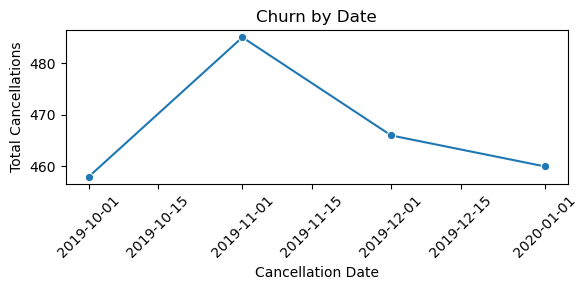

In [14]:
#
churn_by_date = df_churn.groupby('enddate')['churn'].sum().reset_index()

plt.figure(figsize=(6, 3))
sns.lineplot(data=churn_by_date, x='enddate', y='churn', marker='o')

plt.title('Churn by Date')
plt.xlabel('Cancellation Date')
plt.ylabel('Total Cancellations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### little variation (460 - 470 - 480)

### Churn by type, paperlessbilling, and payment method

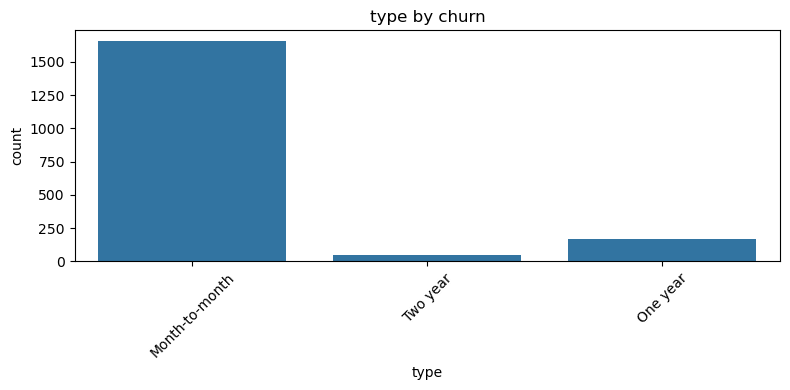

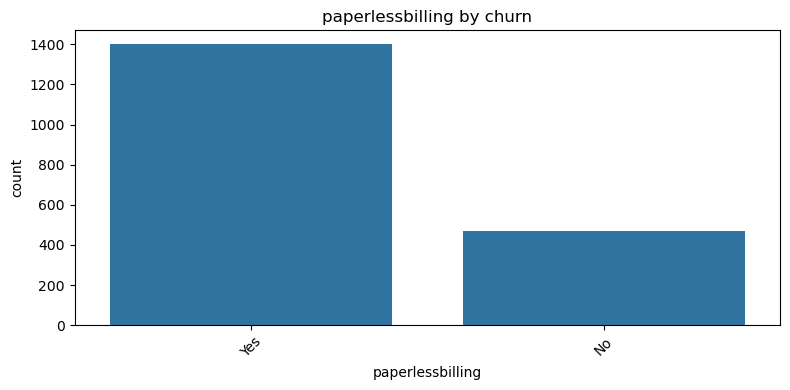

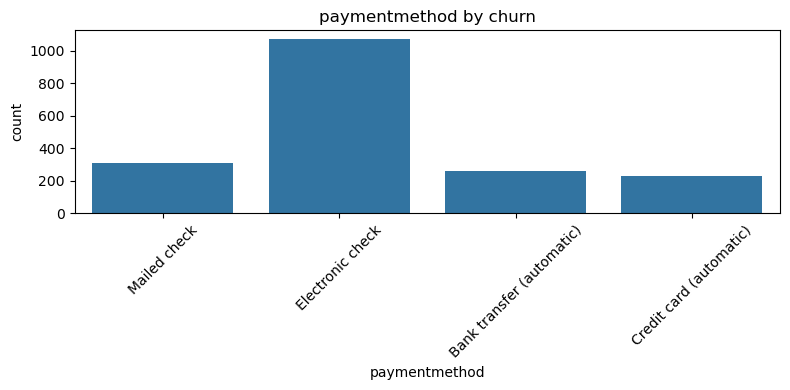

In [15]:
categorical_cols = ['type', 'paperlessbilling', 'paymentmethod']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_churn, x=col)
    plt.title(f'{col} by churn')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### Churn by:
-Type: monthly payment plan shows a significant churn value.

-Paperless Billing: it seems that receiving paper bills somehow helps with customer retention.

-Payment Method:

-Electronic check has a very high churn rate.

-Automatic payments show similar churn values, both relatively low compared to electronic check.

### Contract Duration

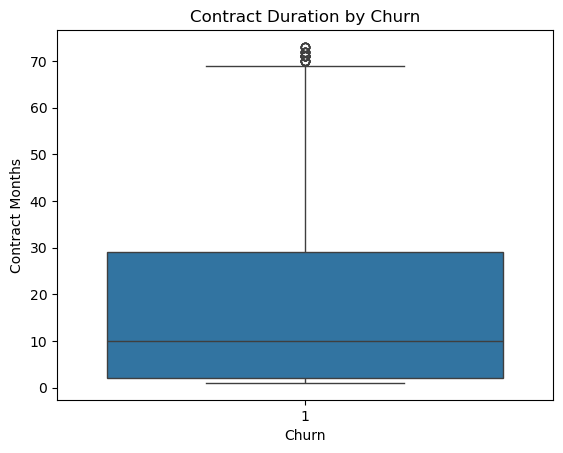

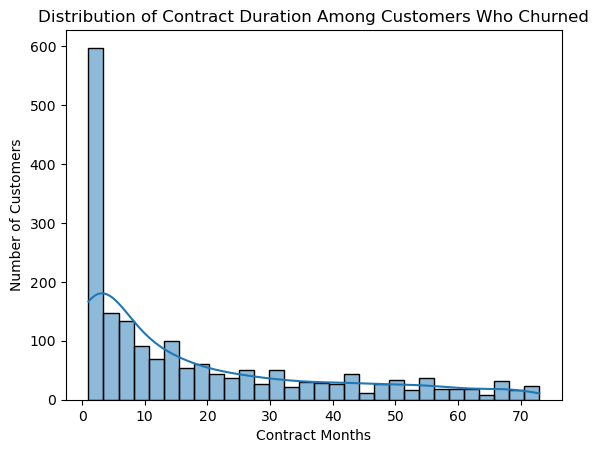

In [16]:
sns.boxplot(data=df_churn, x='churn', y='duration_months')
plt.title('Contract Duration by Churn')
plt.xlabel('Churn')
plt.ylabel('Contract Months')
plt.show()
df_churn['duration_months'].describe()
sns.histplot(data=df_churn, x='duration_months', bins=30, kde=True)
plt.title('Distribution of Contract Duration Among Customers Who Churned')
plt.xlabel('Contract Months')
plt.ylabel('Number of Customers')
plt.show()

- On average, customers who churned stayed for about 1.5 years  
- There is considerable variability  
- 25% churn within the first 2 months — initial retention is a challenge  
- Half of the cancellations occur around month 10  

## Distribution of Values

In [17]:
df_content['churn'].value_counts(normalize=True)

churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64

#### Approximate ratio of 73% did not churn ("0") to 27% churned ("1")  
#### Oversampling and undersampling necessary 

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve


# Modeling

### Oversamplind e undersampling

In [19]:
# Split the data into 60% training, 20% validation, and 20% testing sets
train_data, test_data = train_test_split(df_ohe, test_size=0.2, random_state=54321)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=54321)
print(f"Training set size: {len(train_data)}")
print(f"Validation set size : {len(val_data)}")
print(f"Test set size : {len(test_data)}")

#Training set
X_train = train_data.drop('churn', axis=1) 
y_train = train_data['churn']               
#Validation set
X_val = val_data.drop('churn', axis=1)
y_val = val_data['churn']
#Test set
X_test = test_data.drop('churn', axis=1)
y_test = test_data['churn']

Training set size: 4218
Validation set size : 1407
Test set size : 1407


In [20]:
     # The goal is to achieve a more controlled approach using both techniques

#Creating a downsample function
def balancesample(features, target, fraction, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    # Downsample 0:
    features_downsampled = features_zeros.sample(frac=fraction, random_state=12345)       
    target_downsampled = target_zeros.sample(frac=fraction, random_state=12345)
    
    # Upsample 1:
    features_upsampled = pd.concat([features_ones] * repeat, ignore_index=True)
    target_upsampled = pd.concat([target_ones] * repeat, ignore_index=True)
    
    # Concatenating:
    features_balanced = pd.concat([features_downsampled, features_upsampled], ignore_index=True)
    target_balanced = pd.concat([target_downsampled, target_upsampled], ignore_index=True)
    
    # Shuffling:
    features_balanced, target_balanced = shuffle(features_balanced, target_balanced, random_state=12345)

    return features_balanced, target_balanced

In [21]:
# Keep minority class data and downsample the majority class
fraction=0.35
repeat=1
features_balanced, target_balanced = balancesample(X_train, y_train,fraction, repeat)
print('previous ratio :')
print(y_train.value_counts(normalize=True))
print()
print('balanced ratio :')
print(target_balanced.value_counts(normalize=True))

previous ratio :
churn
0    0.737316
1    0.262684
Name: proportion, dtype: float64

balanced ratio :
churn
1    0.504554
0    0.495446
Name: proportion, dtype: float64


In [22]:
# Model evaluation function
import sklearn.metrics as metrics
def evaluate_model(model, train_features, train_target, test_features, test_target):

    eval_stats = {}

    fig, axs = plt.subplots(1, 3, figsize=(20, 6))

    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):

        eval_stats[type] = {}

        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]

        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)

        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
            # Handling NaN values in F1 score
        max_f1_score = np.max(f1_scores)
        eval_stats[type]['F1'] = max_f1_score

        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)

        roc_auc = metrics.roc_auc_score(target, pred_proba)
        eval_stats[type]['ROC AUC'] = roc_auc

        # Precision-Recall Curve
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps

        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Valor F1
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # Defining cross-validation for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'Valor F1')

        # ROC
        ax = axs[1]
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')
        ax.set_title(f'Curva ROC')

        # Precision-Recall Curve
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # Defining thresholds for cross-validation
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)

    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))

    print(df_eval_stats)

    return

### Decision Tree:

In [23]:
params = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_ad = GridSearchCV(DecisionTreeClassifier(random_state=54321), params, scoring='roc_auc')
grid_ad.fit(features_balanced.select_dtypes(exclude=['datetime64[ns]']), target_balanced)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=54321),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 5, 10]},
             scoring='roc_auc')

          train  test
Accuracy   0.84  0.75
F1         0.84  0.65
APS        0.92  0.68
ROC AUC    0.92  0.85


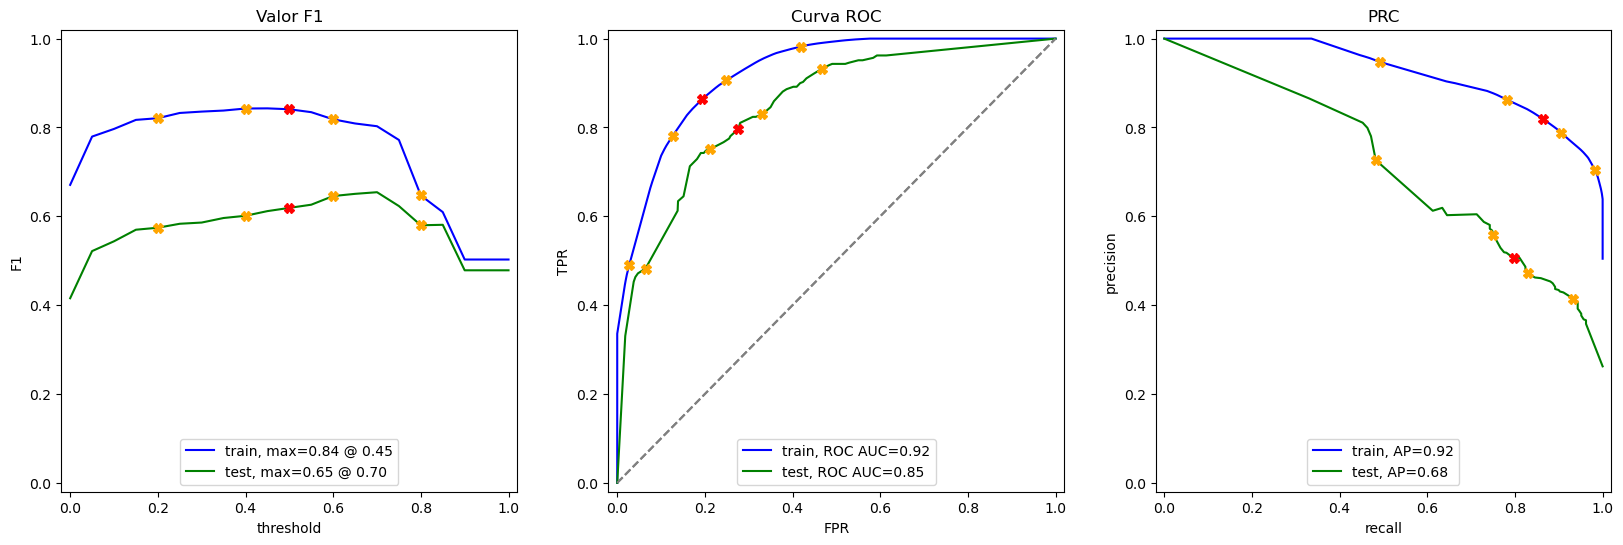

In [24]:
evaluate_model(grid_ad.best_estimator_,
               features_balanced.select_dtypes(exclude=['datetime64[ns]']),
               target_balanced,
               X_val.select_dtypes(exclude=['datetime64[ns]']),
               y_val)


#### ROC AUC    0.92 / 0.85

### LogisticRegression

In [25]:
best_score_lr = 0 
best_para_lr = 0

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for c in range(1,31000,1000): # testanto acuracia com algumas variações de C
    model_lr = LogisticRegression(random_state=54321,C = c, solver='liblinear')    
    model_lr.fit(scaler.fit_transform(features_balanced.select_dtypes(exclude=['datetime64[ns]'])), target_balanced)    
    test_predictions =  model_lr.predict(scaler.transform((X_val.select_dtypes(exclude=['datetime64[ns]']))))
    score = (f1_score(y_val, test_predictions))
    if score > best_score_lr: 
            best_score_lr = score
            best_para_lr = c
print('best f1_score:' ,best_score_lr ,'C:',best_para_lr) 
model_lr = LogisticRegression(random_state=54321,C = best_para_lr, solver='liblinear')
model_lr.fit(scaler.fit_transform(features_balanced.select_dtypes(exclude=['datetime64[ns]'])), target_balanced)

best f1_score: 0.6147540983606558 C: 1001


LogisticRegression(C=1001, random_state=54321, solver='liblinear')

c:\Users\aswit\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\aswit\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\aswit\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\aswit\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


          train  test
Accuracy   0.50  0.74
F1         0.67  0.42
APS        0.55  0.31
ROC AUC    0.58  0.58


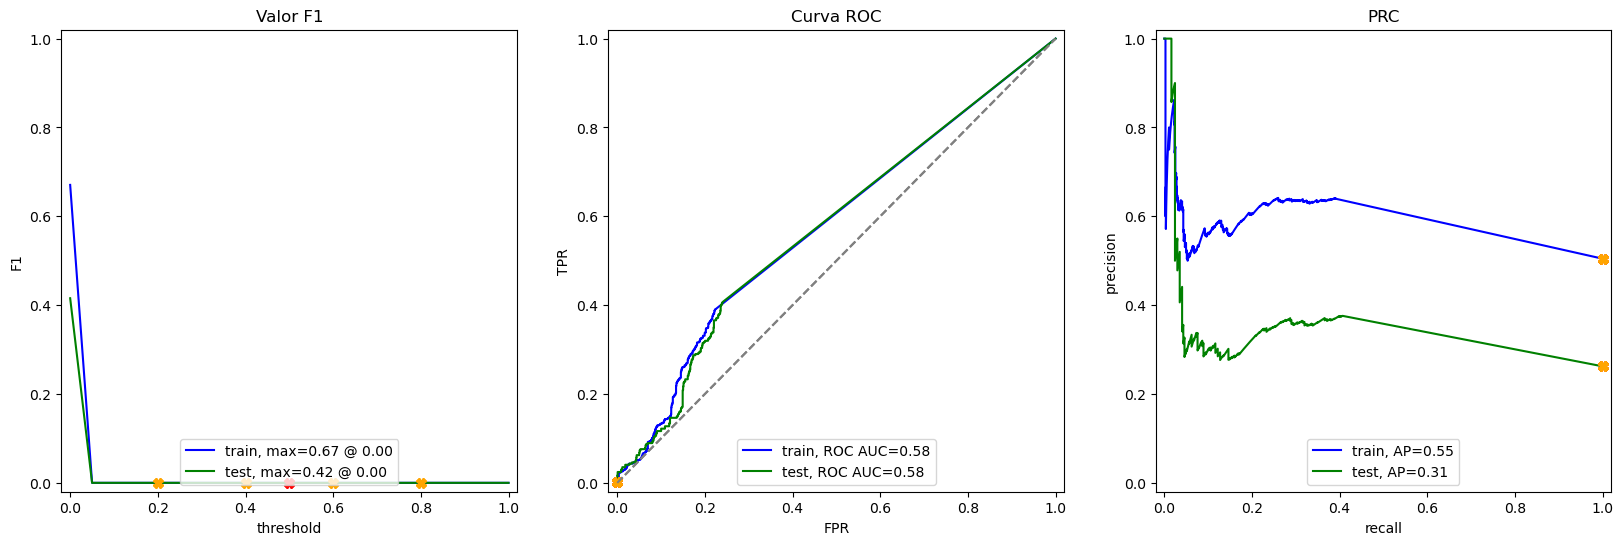

In [26]:
evaluate_model(model_lr,
               features_balanced.select_dtypes(exclude=['datetime64[ns]']),
               target_balanced,
               X_val.select_dtypes(exclude=['datetime64[ns]']),
               y_val)

#### ROC AUC    0.58  0.58

### Random Forest Classifier

In [27]:
params_rf = {
    'n_estimators': [100, 200],             # número de árvores
    'max_depth': [None, 10, 20, 30],        # profundidade máxima da árvore
    'min_samples_split': [2, 5, 10],        # mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4],          # mínimo de amostras em uma folha
    'max_features': ['sqrt', 'log2'],       # número de features para dividir cada nó
    'bootstrap': [True, False]              # usar ou não amostragem com reposição
}
rf = RandomForestClassifier(random_state=42)

grid_rf = GridSearchCV(
    rf,
    param_grid=params_rf,
    cv=5,
    scoring='roc_auc',   
    n_jobs=-1,           
    verbose=1
)

grid_rf.fit(features_balanced, target_balanced)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='roc_auc', verbose=1)

          train  test
Accuracy   0.90  0.78
F1         0.91  0.68
APS        0.98  0.74
ROC AUC    0.98  0.87


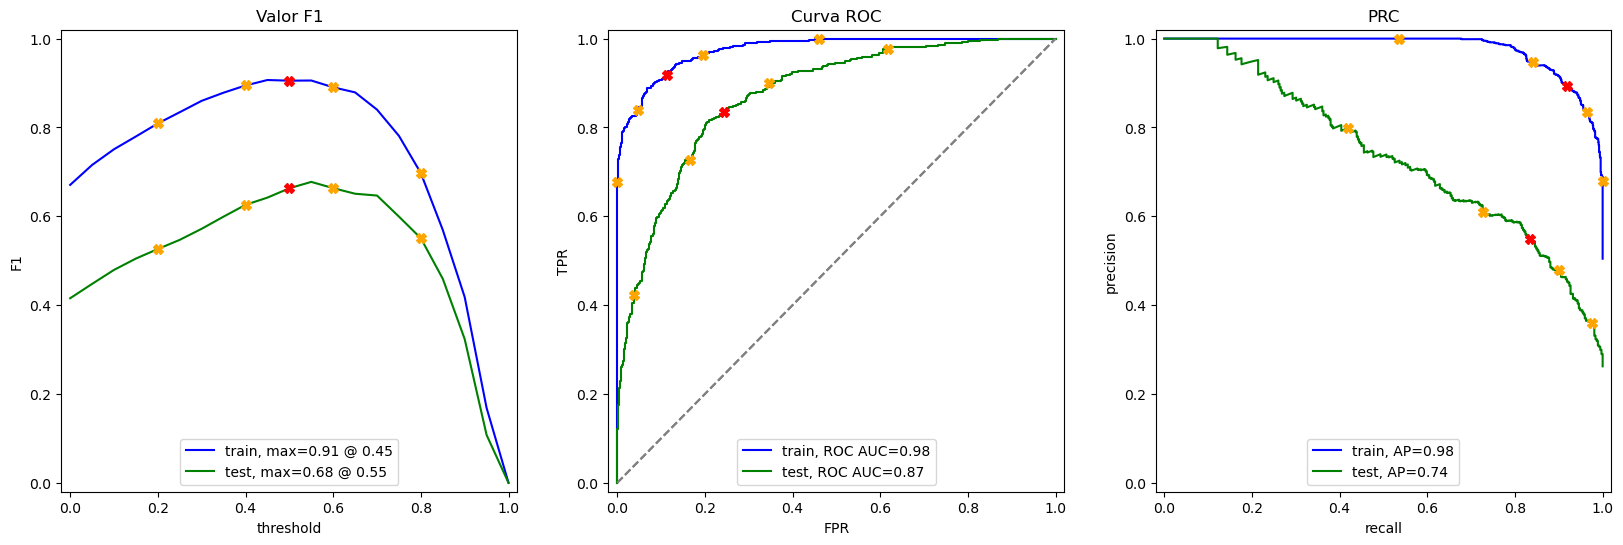

In [28]:
evaluate_model(grid_rf.best_estimator_,
               features_balanced,
               target_balanced,
               X_val,
               y_val)

#### ROC AUC    0.98  0.87

## Gradient Boosting

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=12345)
model_gb.fit(features_balanced, target_balanced)


GradientBoostingClassifier(random_state=12345)

          train  test
Accuracy   0.85  0.79
F1         0.86  0.69
APS        0.94  0.79
ROC AUC    0.93  0.89


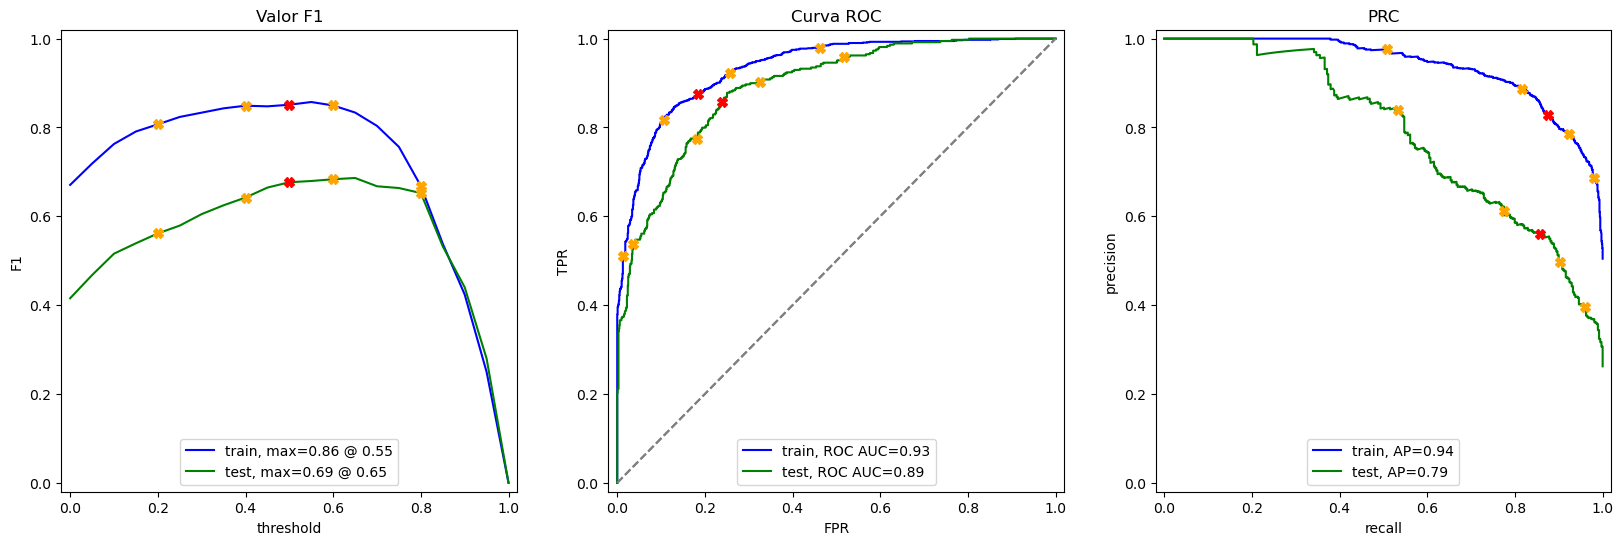

In [30]:
evaluate_model(model_gb,
               features_balanced.select_dtypes(exclude=['datetime64[ns]']),
               target_balanced,
               X_val.select_dtypes(exclude=['datetime64[ns]']),
               y_val)

#### ROC AUC    0.93  0.89

## LightGBM

In [33]:
!pip install lightgbm
from lightgbm import LGBMClassifier

params_lgb = {
    'n_estimators': [100, 200],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.01, 0.1],
    'num_leaves': [31, 50],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'reg_alpha': [0.0, 0.1],
    'reg_lambda': [0.0, 0.1]
}

grid_lgb = GridSearchCV(
    estimator=LGBMClassifier(random_state=42),
    param_grid=params_lgb,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_lgb.fit(features_balanced.select_dtypes(exclude=['datetime64[ns]']), target_balanced)


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ---------------------------- ----------- 1.0/1.5 MB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 2.9 MB/s eta 0:00:00
Fitting 3 folds for each of 384 candidates, totalling 1152 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1108, number of negative: 1088
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 584
[LightGBM] [Info] Number of data points in the train set: 2196, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504554 -> initscore=0.018215
[LightGBM] [Info] Start training from score 0.018215
[LightGBM] [Wa

GridSearchCV(cv=3, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.01, 0.1], 'max_depth': [-1, 5, 10],
                         'n_estimators': [100, 200], 'num_leaves': [31, 50],
                         'reg_alpha': [0.0, 0.1], 'reg_lambda': [0.0, 0.1],
                         'subsample': [0.8, 1]},
             scoring='roc_auc', verbose=1)

          train  test
Accuracy   0.97  0.82
F1         0.97  0.73
APS        1.00  0.83
ROC AUC    1.00  0.91


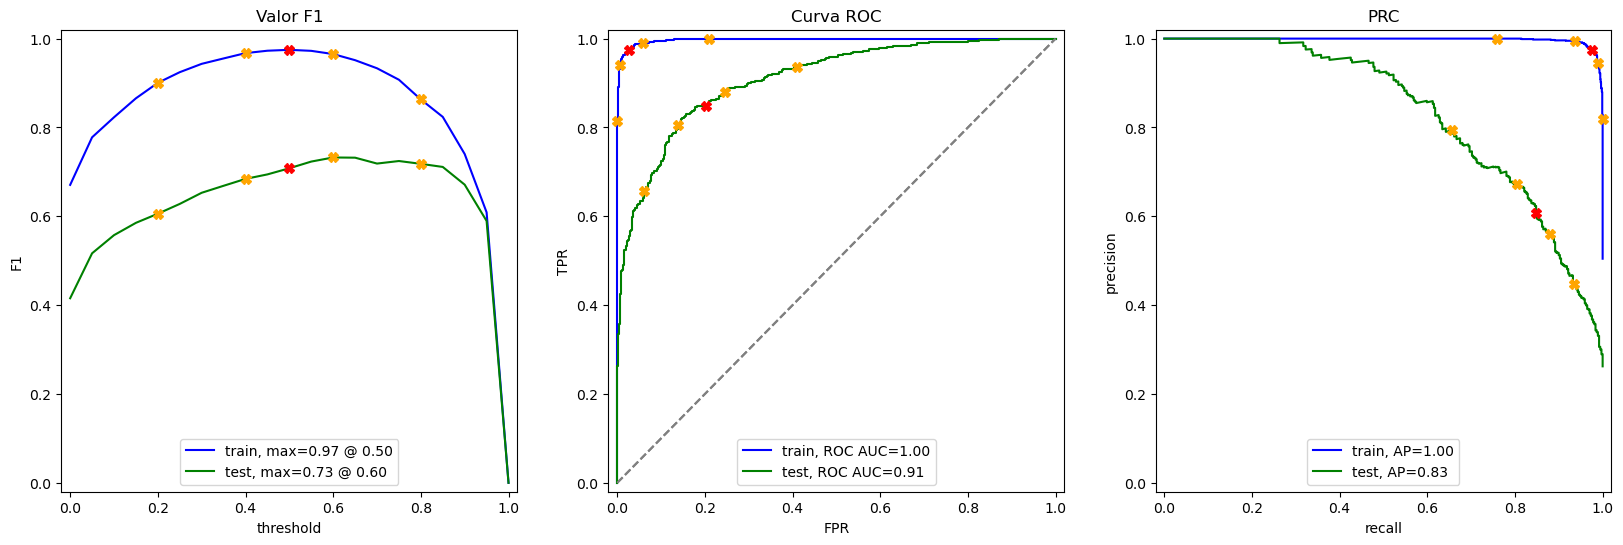

In [34]:
evaluate_model(grid_lgb.best_estimator_,
               features_balanced.select_dtypes(exclude=['datetime64[ns]']),
               target_balanced,
               X_val.select_dtypes(exclude=['datetime64[ns]']),
               y_val)

#### ROC AUC    1.00  0.91

## CatBoost 

In [37]:
!pip install CatBoost
from catboost import CatBoostClassifier

params_cat = {
    'iterations': [100, 200],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5],
}

grid_cat = GridSearchCV(
    estimator=CatBoostClassifier(verbose=0, random_state=42),
    param_grid=params_cat,
    scoring='roc_auc',
    cv=4,
    n_jobs=-1,
    verbose=1
)

grid_cat.fit(features_balanced.select_dtypes(exclude=['datetime64[ns]']), target_balanced)

   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.5/102.4 MB 4.2 MB/s eta 0:00:25
    --------------------------------------- 1.3/102.4 MB 3.5 MB/s eta 0:00:29
    --------------------------------------- 1.8/102.4 MB 3.2 MB/s eta 0:00:31
   - -------------------------------------- 2.6/102.4 MB 3.3 MB/s eta 0:00:31
   - -------------------------------------- 3.4/102.4 MB 3.5 MB/s eta 0:00:29
   - -------------------------------------- 4.5/102.4 MB 3.7 MB/s eta 0:00:27
   -- ------------------------------------- 5.5/102.4 MB 3.9 MB/s eta 0:00:26
   -- ------------------------------------- 6.0/102.4 MB 3.7 MB/s eta 0:00:27
   -- ------------------------------------- 6.8/102.4 MB 3.7 MB/s eta 0:00:26
   --- ------------------------------------ 7.9/102.4 MB 3.8 MB/s eta 0:00:25
   --- ------------------------------------ 8.9/102.4 MB 4.0 MB/s eta 0:00:24
   --- ------------------------------------ 9.7/102.4 MB 4.0 MB/s eta 0

c:\Users\aswit\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\aswit\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\aswit\anaconda3\Lib\site-packages\catboost\core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline, use_best_model,
  File "c:\Users\aswit\anaconda3\Lib\site-packages\catboost\core.py", line 2

GridSearchCV(cv=4,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000022EAA0586E0>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8], 'iterations': [100, 200],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='roc_auc', verbose=1)

          train  test
Accuracy   0.88  0.80
F1         0.88  0.73
APS        0.96  0.82
ROC AUC    0.95  0.90


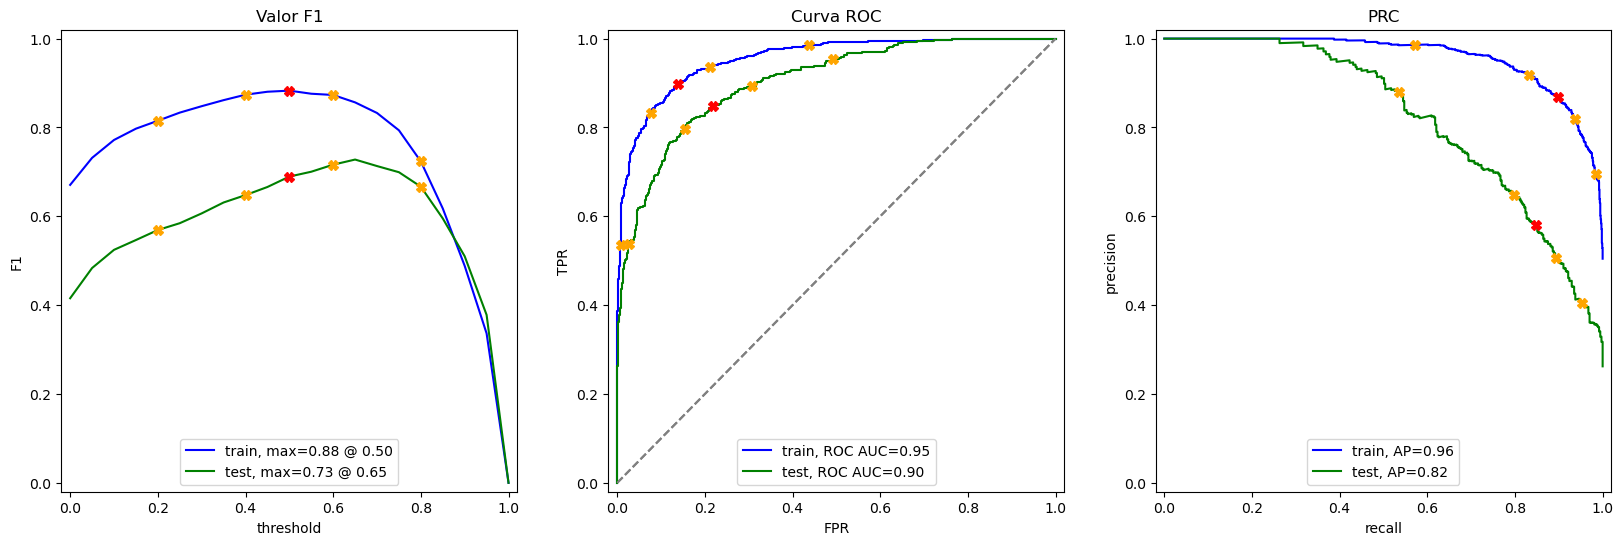

In [38]:
evaluate_model(grid_cat.best_estimator_,
               features_balanced.select_dtypes(exclude=['datetime64[ns]']),
               target_balanced,
               X_val.select_dtypes(exclude=['datetime64[ns]']),
               y_val)

#### ROC AUC    0.95  0.90

## Conclusion:

- Best model: LightGBM with ROC AUC of 0.91  
- Models like Gradient Boosting and CatBoost also showed very satisfactory results  
- Random Forest model delivered interesting results, notable for being a simpler model  